In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
import warnings

In [10]:
warnings.filterwarnings("ignore")

In [12]:
train= pd.read_csv('train_ctrUa4K.csv')

In [13]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
train.shape

(614, 13)

In [17]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

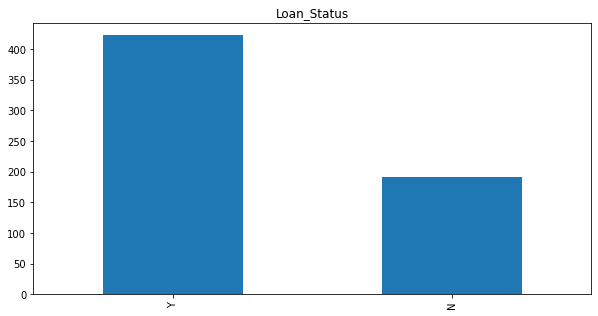

In [32]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,5),title='Loan_Status')
plt.savefig('Loan_Status.jpeg')

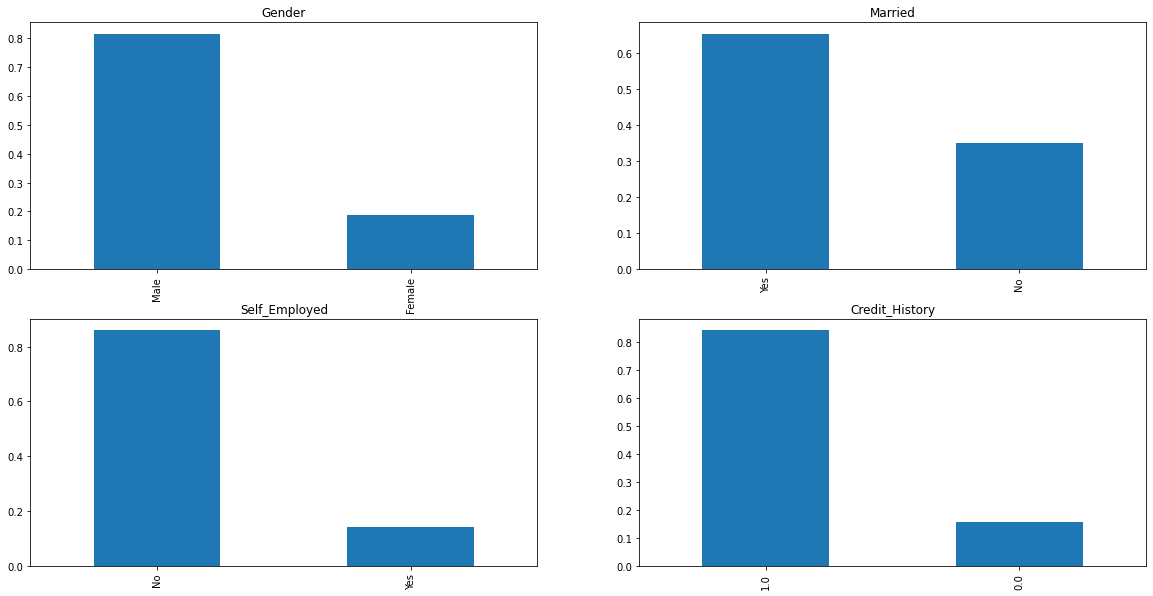

In [34]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.savefig('Unvariate Analysis.jpeg')

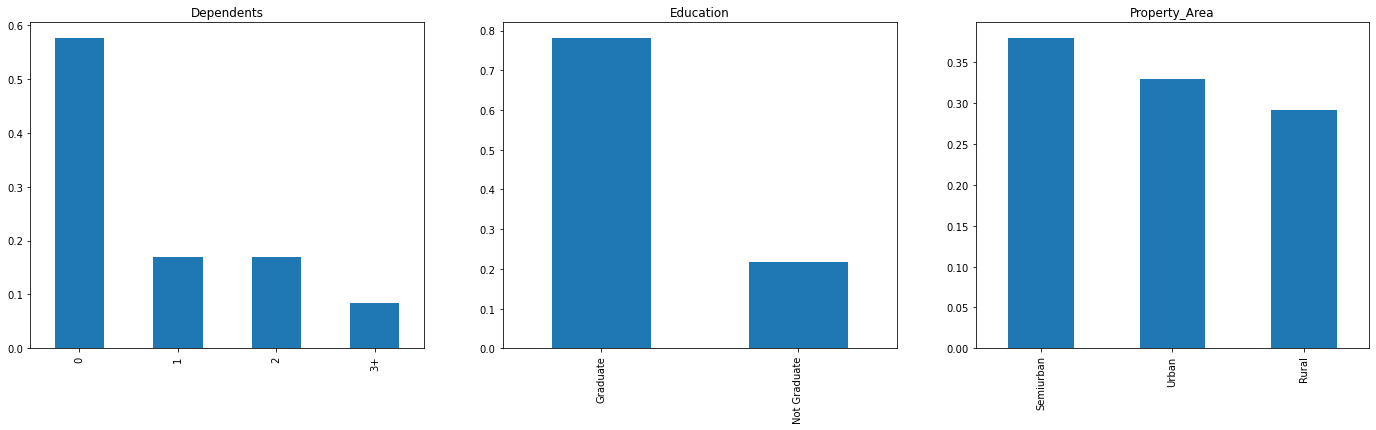

In [35]:
plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')
plt.savefig('Unvariate Analysis2.jpeg')

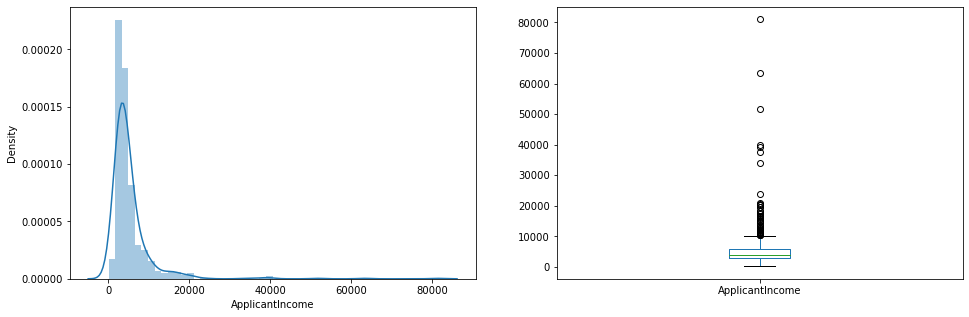

In [36]:
plt.figure(3)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.savefig('Density.jpeg')

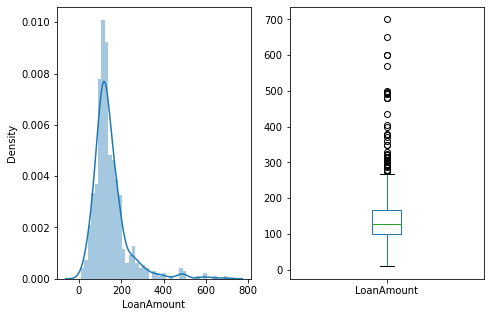

In [37]:
plt.figure(4)
plt.subplot(141)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(142)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.savefig('Density2.jpeg')

<Figure size 432x288 with 0 Axes>

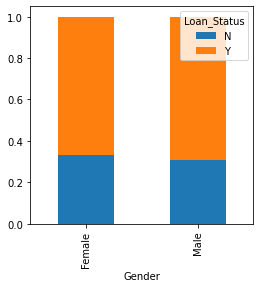

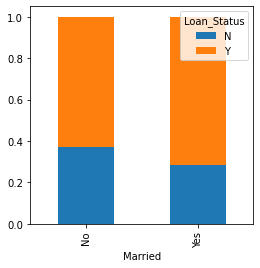

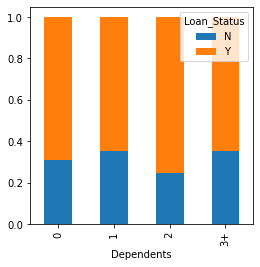

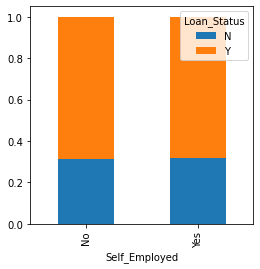

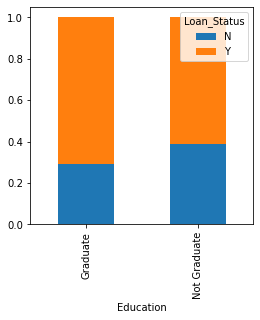

In [49]:
plt.figure(5)
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.savefig('Bivariate.jpeg')

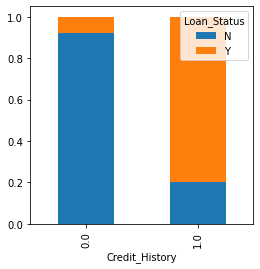

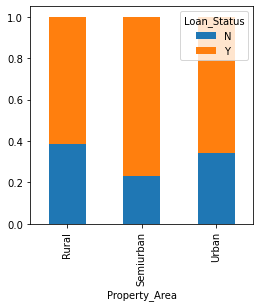

In [50]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.savefig('Bivariate.jpeg')

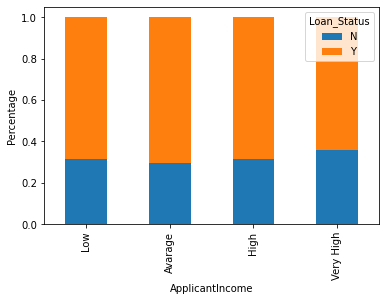

In [52]:
bins=[0,2500,4000,6000,8100]
group=['Low','Avarage','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')
plt.savefig('Bivariate5.jpeg', bbox_inches='tight')

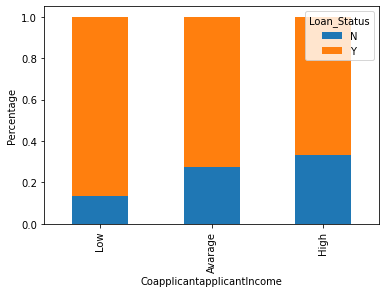

In [53]:
biny=[0,1000,3000,42000]
groupy=['Low','Avarage','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],biny,labels=groupy)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantapplicantIncome')
Pi=plt.ylabel('Percentage')
plt.savefig('Bivariate6.jpeg', bbox_inches='tight')

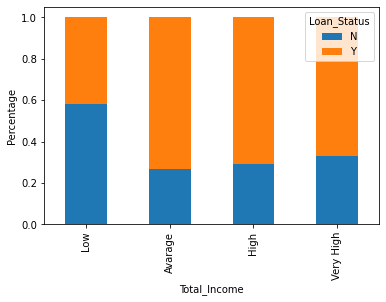

In [56]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Avarage','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')
plt.savefig('Bivariate7.jpeg',bbox_inches='tight')

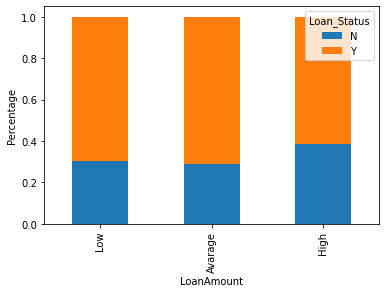

In [57]:
bins=[0,100,200,700]
group=['Low','Avarage','High']
train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
Loan_Amount_bin=pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')
plt.savefig('Bivariate8.jpeg', bbox_inches='tight')

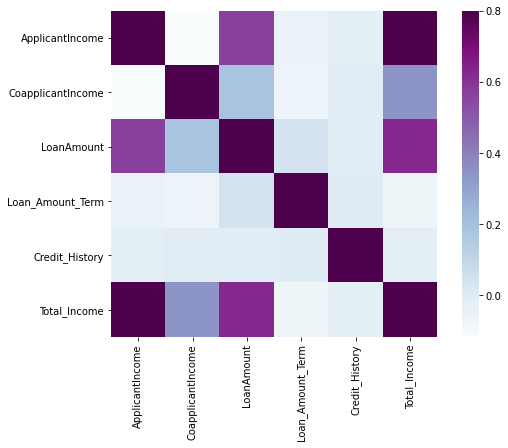

In [58]:
matrix=train.corr()
ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True , cmap="BuPu");
plt.savefig('Corr.jpeg', bbox_inches='tight')